In [2]:
!pip install tensorboard
!pip install -q tf-nightly-2.0-preview

ERROR: Could not find a version that satisfies the requirement tf-nightly-2.0-preview (from versions: none)
ERROR: No matching distribution found for tf-nightly-2.0-preview


In [3]:
%load_ext tensorboard

In [4]:
from tensorflow import summary

In [1]:
import os
import re
from tqdm import tqdm
import numpy as np
import pandas as pd
import nltk
nltk.download("all")
import matplotlib.pyplot as plt
import torch

%matplotlib inline

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

## download dataset

### load dataset

In [5]:
def load_text(path):
    """Load text data, lowercase text and save to a list."""

    with open(path, 'rb') as f:
        texts = []
        for line in f:
            texts.append(line.decode(errors='ignore').lower().strip())

    return texts

read file

In [6]:
import pandas as pd
df = pd.read_csv("/content/dataset artificial intelligence.csv", delimiter=";")
df

,Value,Komentar,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,1.0,Accelerating discovery in artificial intellige...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Positife
1,1.0,@Simulation305 @leadlagreport While the Fed is...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Positife
2,1.0,Being impressed by the latest developments in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Positife
3,1.0,Elon Musk's Bold Move: Betting Tesla's Future ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Positife
4,NaN,@The_Yodacat AI: Artificial Intelligence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,NaN,@Walmart using #AI to streamline organization ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1023,NaN,"1) The Infinite Monkeys have been digitalised,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1024,NaN,Did you hear about the latest popular variety ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1025,NaN,"Exploring the World of Generative AI, Foundati...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df.iloc[:,0:2]
df

,Value,Komentar
0,1.0,Accelerating discovery in artificial intellige...
1,1.0,@Simulation305 @leadlagreport While the Fed is...
2,1.0,Being impressed by the latest developments in ...
3,1.0,Elon Musk's Bold Move: Betting Tesla's Future ...
4,NaN,@The_Yodacat AI: Artificial Intelligence
...,...,...
1022,NaN,@Walmart using #AI to streamline organization ...
1023,NaN,"1) The Infinite Monkeys have been digitalised,..."
1024,NaN,Did you hear about the latest popular variety ...
1025,NaN,"Exploring the World of Generative AI, Foundati..."


In [8]:
df.shape

(1027, 2)

In [9]:
df.Value.value_counts(dropna=False)

NaN    630
1.0    241
0.0    156
Name: Value, dtype: int64

In [10]:
df.Value.unique()

array([ 1., nan,  0.])

<Axes: ylabel='Value'>

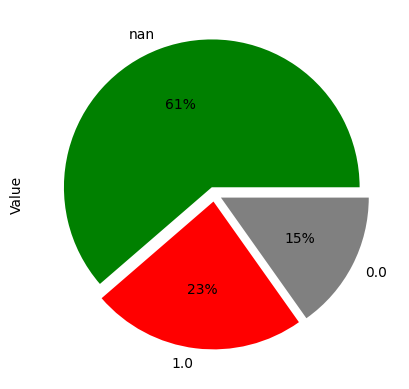

In [11]:
import matplotlib.pyplot as plt
# colors
colors = ['green', 'red','gray']
explode = (0.05, 0.05, 0.05)
# Pie Chart
df.Value.value_counts(dropna=False).plot(kind='pie', autopct='%1.0f%%', explode=explode, colors=colors)

# data cleaning

In [12]:
def cleaningcuit(cuit):
  # hapus tag ke seseorang. misal @anies, @jokowi, @Nasdem akan dihapus
  cuit = re.sub(r'@[A-Za-a0-9]+',' ',cuit)
  # hapus hash. misalnya #anies, #ganjar, #gabener akan dihapus
  cuit = re.sub(r'#[A-Za-z0-9]+',' ',cuit)
  # hapus link. misalnya https://www.google.com/ akan dihapus
  cuit = re.sub(r"http\S+",' ',cuit)
  # hapus angka. misal ada angka 2024 akan dihapus
  cuit = re.sub(r'[0-9]+',' ',cuit)
  # hapus tanda baca. misal ada tanda ? titik koma dll akan dihapus
  cuit = re.sub(r"[-()\"#/@;:<>{}'+=~|.!?,_]", " ", cuit)
  # hapus spasi yg banyak. misalnya spasinya 2 kali maka akan dihapus
  cuit = cuit.strip(' ')
  # casefolding lower case
  cuit = cuit.lower()
  # decode emoji
  cuit = cuit.encode('ascii', 'ignore').decode('ascii')
  # hapus cuitan yg tlh di decode
  pola = re.compile(r'(.)\1{2,}', re.DOTALL)
  cuit = pola.sub(r'\1', cuit)
  return cuit
df['Komentar']= df['Komentar'].apply(cleaningcuit)

In [13]:
df

,Value,Komentar
0,1.0,accelerating discovery in artificial intellige...
1,1.0,imulation leadlagreport while the fed is known...
2,1.0,being impressed by the latest developments in ...
3,1.0,elon musk s bold move betting tesla s future ...
4,NaN,he yodacat ai artificial intelligence
...,...,...
1022,NaN,lmart using to streamline organization what w...
1023,NaN,the infinite monkeys have been digitalised an...
1024,NaN,did you hear about the latest popular variety ...
1025,NaN,exploring the world of generative ai foundati...


# stop word

In [16]:
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')
# Create a set of stop words
stop_words = set(stopwords.words('english'))

# Define a function to remove stop words from a sentence
def remove_stop_words(sentence):
  # Split the sentence into individual words
  words = sentence.split()

  # Use a list comprehension to remove stop words
  filtered_words = [word for word in words if word not in stop_words]

  # Join the filtered words back into a sentence
  return ' '.join(filtered_words)

In [17]:
df['Komentar'] = df['Komentar'].apply(remove_stop_words)

In [18]:
df

,Value,Komentar
0,1.0,accelerating discovery artificial intelligence...
1,1.0,imulation leadlagreport fed known three strong...
2,1.0,impressed latest developments world sports tec...
3,1.0,elon musk bold move betting tesla future artif...
4,NaN,yodacat ai artificial intelligence
...,...,...
1022,NaN,lmart using streamline organization mean worke...
1023,NaN,infinite monkeys digitalised turned efforts mu...
1024,NaN,hear latest popular variety show led lighting ...
1025,NaN,exploring world generative ai foundation model...


# stemming

In [19]:
import nltk
nltk.download('wordnet')
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def stemming_words(text):
    words = text.split()
    words = [ps.stem(word) for word in words]
    return ' '.join(words)
df['Komentar'] = df['Komentar'].apply(stemming_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
df

,Value,Komentar
0,1.0,acceler discoveri artifici intellig scienc
1,1.0,imul leadlagreport fed known three strong supp...
2,1.0,impress latest develop world sport technolog d...
3,1.0,elon musk bold move bet tesla futur artifici i...
4,NaN,yodacat ai artifici intellig
...,...,...
1022,NaN,lmart use streamlin organ mean worker seoul
1023,NaN,infinit monkey digitalis turn effort music via...
1024,NaN,hear latest popular varieti show led light pro...
1025,NaN,explor world gener ai foundat model larg langu...


In [21]:
pos_text = df[df.Value == 1.0]
pos_text

,Value,Komentar
0,1.0,acceler discoveri artifici intellig scienc
1,1.0,imul leadlagreport fed known three strong supp...
2,1.0,impress latest develop world sport technolog d...
3,1.0,elon musk bold move bet tesla futur artifici i...
6,1.0,check latest articl way artifici intellig may ...
...,...,...
662,1.0,use moonbot artifici intellig get cuan everi day
663,1.0,impact gener artifici intellig ai busi oper gr...
666,1.0,perfect busi individu ai storytel space
667,1.0,poor nawa nois disturb want record video fortu...


In [22]:
pos_text.Value.size

241

In [23]:
pos_text.Value.unique()

array([1.])

In [24]:
neg_text = df[df.Value == 0.0]
neg_text

,Value,Komentar
5,0.0,use artifici intellig ai machin learn ml expan...
17,0.0,zanxbt choxv uli x ond x yo even chatgpt could...
18,0.0,time redesign age forb joemckendrick
22,0.0,hacker red team break stuff left right dont ex...
24,0.0,transport transport artifici intellig area dri...
...,...,...
649,0.0,provoc gritti darkli comic novel unlov bogyman...
656,0.0,may becom first nation destroy enemi ignor tea...
658,0.0,read today follow footstep wormgpt threat acto...
661,0.0,ai artifici intellig everi day danger yesterda...


In [25]:
neg_text.Value.unique()

array([0.])

In [26]:
neg_text.Value.size

156

satukan data cuitan dg label

In [27]:
# Concatenate and label data
texts = pd.concat([pos_text.Komentar, neg_text.Komentar])
labels = pd.concat([pos_text.Value, neg_text.Value])

In [28]:
texts

0             acceler discoveri artifici intellig scienc
1      imul leadlagreport fed known three strong supp...
2      impress latest develop world sport technolog d...
3      elon musk bold move bet tesla futur artifici i...
6      check latest articl way artifici intellig may ...
                             ...                        
649    provoc gritti darkli comic novel unlov bogyman...
656    may becom first nation destroy enemi ignor tea...
658    read today follow footstep wormgpt threat acto...
661    ai artifici intellig everi day danger yesterda...
664    accord research conduct mckinsey global instit...
Name: Komentar, Length: 397, dtype: object

In [29]:
labels

0      1.0
1      1.0
2      1.0
3      1.0
6      1.0
      ... 
649    0.0
656    0.0
658    0.0
661    0.0
664    0.0
Name: Value, Length: 397, dtype: float64

In [30]:
texts.shape

(397,)

In [31]:
labels.shape

(397,)

In [32]:
# convert pandas series to numpy array
texts = texts.to_numpy()
labels = labels.to_numpy()

In [33]:
labels = labels.astype(int)

In [34]:
texts

array(['acceler discoveri artifici intellig scienc',
       'imul leadlagreport fed known three strong support economi spend infrastructur artifici intellig quantum physic continu enter area economi post come conclus idea happen',
       'impress latest develop world sport technolog dotmoov realli come interest innov blend sport blockchain $moov',
       'elon musk bold move bet tesla futur artifici intellig',
       'check latest articl way artifici intellig may chang futur via inkedin',
       'environ sustain artifici intellig play role sustain solut energi manag wast reduct effect use natur resourc',
       'new blog artifici intellig revolution spot wildfir protect forest check latest post ai make differ fire detect worldwid read',
       'natur languag process thank artifici intellig languag barrier overcom great improv made area translat text analysi custom servic',
       'educ artifici intellig use provid custom educ student support teacher develop educ materi',
       'health

In [35]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## download word embedding

In [36]:
%%time
URL = "https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M.vec.zip"
FILE = "fastText"

if os.path.isdir(FILE):
    print("fastText exists.")
else:
    !wget -P $FILE $URL
    !unzip $FILE/crawl-300d-2M.vec.zip -d $FILE

--2023-08-20 07:17:33--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.227.219.33, 13.227.219.59, 13.227.219.70, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.227.219.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1523785255 (1.4G) [application/zip]
Saving to: ‘fastText/crawl-300d-2M.vec.zip’

crawl-300d-2M.vec.z 100%[===================>]   1.42G  27.5MB/s    in 62s     

2023-08-20 07:18:35 (23.5 MB/s) - ‘fastText/crawl-300d-2M.vec.zip’ saved [1523785255/1523785255]

Archive:  fastText/crawl-300d-2M.vec.zip
  inflating: fastText/crawl-300d-2M.vec  
CPU times: user 16.3 s, sys: 508 ms, total: 16.8 s
Wall time: 2min


## setting ke gpu jika ada

In [37]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


## data preparation untuk word vector
kita hrs tokenize lalu buat dictonary dari vocabulary nya melalui `word2idx` kemudian convert token kedlm id/index dan terakhir build embedding layer

embedding layer adlh tabel index(id) dg kata/token sebagai input untuk menghslkan(output) word vector. dimensinya (N, d)dimana
* N : size dari vocabulary(total kata)
* d : dimensi embedding

lalu untuk fine-tuned pretrained word vektor mak kita perlu membuat embedding layer melalui class nn.Module dg inputnya adlh input_ids (index dari token dalam dictionary vocabulary)



### tokenizer
fungsi dibwh ini akan mengubah kalimat menjd kata, lalu buat vocabulary dan temukan panjang maksimal yg tetap dari suatu kalimat tujuannya agar setiap kalimat punya panjang yg sama.

In [38]:
from nltk.tokenize import word_tokenize
from collections import defaultdict

def tokenize(texts):
    """Tokenize texts, build vocabulary and find maximum sentence length.

    Args:
        texts (List[str]): List of text data

    Returns:
        tokenized_texts (List[List[str]]): List of list of tokens
        word2idx (Dict): Vocabulary built from the corpus
        max_len (int): Maximum sentence length
    """
    # inisialisai panjang kalimat
    max_len = 0
    # token
    tokenized_texts = []
    # dictonary untuk vocabulary (berisi id/index-kata)
    word2idx = {}

    # Add <pad> and <unk> tokens to the vocabulary.  dan jika kata dlm kalimat tdk ada didlm  maka ganti
    word2idx['<pad>'] = 0
    word2idx['<unk>'] = 1

    # Building our vocab from the corpus starting from index 2
    idx = 2
    for sent in texts:
      # lakukan tokenisasi
        tokenized_sent = word_tokenize(sent)

        # Add `tokenized_sent` to `tokenized_texts`. tambahkan token yg baru yg berasal dari kalimat kedlm tokenized_texts
        tokenized_texts.append(tokenized_sent)

        # Add new token to `word2idx`.
        for token in tokenized_sent:
          # jika token tdk ada didilm kamus word2idx maka
            if token not in word2idx:
              # masukkan token tsb kedlm kamus word2idx sebagai token yg baru (dan setting tokennya sebagai key sedangkan index nya sebagai value)
                word2idx[token] = idx
                idx += 1

        # Update `max_len`
        max_len = max(max_len, len(tokenized_sent))

    return tokenized_texts, word2idx, max_len

kemudian fungsi dibwh ini akan mengambil output dr fungsi diatas sebagai inputannya lalu menambahkan PAD pada kalimat yang panjangnya(jumlah kata) kurang dari yg telah ditetapkan diatas sehingga return `input_ids` dlm bntk numpy array

In [39]:
def encode(tokenized_texts, word2idx, max_len):
    """Pad each sentence to the maximum sentence length and encode tokens to
    their index in the vocabulary.

    Returns:
        input_ids (np.array): Array of token indexes in the vocabulary with
            shape (N, max_len). It will the input of our CNN model.
    """

    # array untuk menyimpan
    input_ids = []
    for tokenized_sent in tokenized_texts:
        # Pad sentences to max_len. jika panjang kata dalam kalimatnya kurang dari max_len maka tambahkan token PAD sebanyak jumlah kata yg kurangnya (didptkan dg cara max_len dikurangi total panjang dari kalimat yg kurang)
        tokenized_sent += ['<pad>'] * (max_len - len(tokenized_sent))

        # Encode tokens to input_ids. simpan token/kata yg berasal dari 1 kalimat tertentu kedlm array input_id (ingat array sudah punya index scra otomatis sehinga index didpt langsung dari define array)
        input_id = [word2idx.get(token) for token in tokenized_sent]
        # tambahkan token-token dari 1 kalimat tsb kedlm input_ids
        input_ids.append(input_id)

    return np.array(input_ids)

## load pretrained vector (word embedding)
load the pretrain vectors untuk setiap token dlm kamus vocabulary yg tlh dibuat.

jika token tdk ada maka akan diinisialisasi sebagai random word vector dg length dan variance yg sama

In [40]:
from tqdm import tqdm_notebook

def load_pretrained_vectors(word2idx, fname):
    """Load pretrained vectors and create embedding layers.

    Args:
        word2idx (Dict): Vocabulary built from the corpus
        fname (str): Path to pretrained vector file

    Returns:
        embeddings (np.array): Embedding matrix with shape (N, d) where N is
            the size of word2idx and d is embedding dimension
    """

    print("Loading pretrained vectors...")
    # read/open file pretrained embedding
    fin = open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    # mapping
    n, d = map(int, fin.readline().split())

    # Initilize random embeddings (jika token tdk ada di pretrained)
    embeddings = np.random.uniform(-0.25, 0.25, (len(word2idx), d)) # random word vector dg variance dan length yg sama sprti di pretrained
    embeddings[word2idx['<pad>']] = np.zeros((d,)) # tambahkan padding kedlm embedding

    # Load pretrained vectors
    count = 0
    for line in tqdm_notebook(fin):
        tokens = line.rstrip().split(' ')
        word = tokens[0]
        if word in word2idx:
            count += 1
            embeddings[word2idx[word]] = np.array(tokens[1:], dtype=np.float32)

    print(f"There are {count} / {len(word2idx)} pretrained vectors found.")

    return embeddings

jlnkan

In [41]:
# Tokenize, build vocabulary, encode tokens
print("Tokenizing...\n")
tokenized_texts, word2idx, max_len = tokenize(texts)
input_ids = encode(tokenized_texts, word2idx, max_len)

# Load pretrained vectors
embeddings = load_pretrained_vectors(word2idx, "fastText/crawl-300d-2M.vec")
embeddings = torch.tensor(embeddings)

Tokenizing...

Loading pretrained vectors...


<ipython-input-40-1040c9f14e90>:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for line in tqdm_notebook(fin):


0it [00:00, ?it/s]

There are 1758 / 2094 pretrained vectors found.


## DataLoader
agar data menjd batch-batch

In [42]:
from torch.utils.data import (TensorDataset, DataLoader, RandomSampler,
                              SequentialSampler)

def data_loader(train_inputs, val_inputs, train_labels, val_labels,
                batch_size=50):
    """Convert train and validation sets to torch.Tensors and load them to
    DataLoader.
    """

    # Convert data type to torch.Tensor. convert tipe data menjd tensor kemudian tensor nya diconvert lagi menjd tuple
    train_inputs, val_inputs, train_labels, val_labels = tuple(torch.tensor(data) for data in [train_inputs, val_inputs, train_labels, val_labels])

    # Specify batch_size
    batch_size = 50

    # Create DataLoader for training data
    train_data = TensorDataset(train_inputs, train_labels)
    train_sampler = RandomSampler(train_data)
    train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

    # Create DataLoader for validation data
    val_data = TensorDataset(val_inputs, val_labels)
    val_sampler = SequentialSampler(val_data)
    val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

    return train_dataloader, val_dataloader

## split data

In [43]:
from sklearn.model_selection import train_test_split

# Train Test Split
train_inputs, val_inputs, train_labels, val_labels = train_test_split(input_ids, labels, test_size=0.1, random_state=42)
# convert series to numpy array

# Load data to PyTorch DataLoader
train_dataloader, val_dataloader = data_loader(train_inputs, val_inputs, train_labels, val_labels, batch_size=50)

## build model

In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN_NLP(nn.Module):
    """An 1D Convulational Neural Network for Sentence Classification."""
    def __init__(self,
                 pretrained_embedding=None,
                 freeze_embedding=False,
                 vocab_size=None,
                 embed_dim=300,
                 filter_sizes=[3, 4, 5],
                 num_filters=[100, 100, 100],
                 num_classes=2,
                 dropout=0.5):
        """
        The constructor for CNN_NLP class.

        Args:
            pretrained_embedding (torch.Tensor): Pretrained embeddings with
                shape (vocab_size, embed_dim)
            freeze_embedding (bool): Set to False to fine-tune pretraiend
                vectors. Default: False
            vocab_size (int): Need to be specified when not pretrained word
                embeddings are not used.
            embed_dim (int): Dimension of word vectors. Need to be specified
                when pretrained word embeddings are not used. Default: 300
            filter_sizes (List[int]): List of filter sizes. Default: [3, 4, 5]
            num_filters (List[int]): List of number of filters, has the same
                length as `filter_sizes`. Default: [100, 100, 100]
            n_classes (int): Number of classes. Default: 2
            dropout (float): Dropout rate. Default: 0.5
        """

        super(CNN_NLP, self).__init__()
        # Embedding layer. jika ada pretrained embedding
        if pretrained_embedding is not None:
          # setting vocab_size dg size dr vocab pretrained dan dimensi embedding (embed_dim) dg dimensi embedding pretrained
            self.vocab_size, self.embed_dim = pretrained_embedding.shape
            # latih ulang pretrained embedding (Fine-tune) jika freeze=False, jika tdk ingin dilatih ulang (fine-tune) maka set True
            self.embedding = nn.Embedding.from_pretrained(pretrained_embedding,
                                                          freeze=freeze_embedding)
        # jika pretrained embedding nya None
        else:
          # maka setting embedding dg dimensi embedding data kita & vocab size nya sesuai data kita atau yg kita inginkan tp ingat hrs sesuai dg data yg kita miliki
            self.embed_dim = embed_dim
            self.embedding = nn.Embedding(num_embeddings=vocab_size,
                                          embedding_dim=self.embed_dim,
                                          padding_idx=0,
                                          max_norm=5.0)
        # Conv Network
        self.conv1d_list = nn.ModuleList([
            nn.Conv1d(in_channels=self.embed_dim,
                      out_channels=num_filters[i],
                      kernel_size=filter_sizes[i])
            for i in range(len(filter_sizes))
        ])
        # Fully-connected layer and Dropout
        self.fc = nn.Linear(np.sum(num_filters), num_classes)
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, input_ids):
        """Perform a forward pass through the network.

        Args:
            input_ids (torch.Tensor): A tensor of token ids with shape
                (batch_size, max_sent_length)

        Returns:
            logits (torch.Tensor): Output logits with shape (batch_size,
                n_classes)
        """

        # Get embeddings from `input_ids`. Output shape: (b, max_len, embed_dim)
        x_embed = self.embedding(input_ids).float()

        # Permute `x_embed` to match input shape requirement of `nn.Conv1d`.
        # Output shape: (b, embed_dim, max_len)
        x_reshaped = x_embed.permute(0, 2, 1)

        # Apply CNN and ReLU. Output shape: (b, num_filters[i], L_out)
        x_conv_list = [F.relu(conv1d(x_reshaped)) for conv1d in self.conv1d_list]

        # Max pooling. Output shape: (b, num_filters[i], 1)
        x_pool_list = [F.max_pool1d(x_conv, kernel_size=x_conv.shape[2])
            for x_conv in x_conv_list]

        # Concatenate x_pool_list to feed the fully connected layer.
        # Output shape: (b, sum(num_filters))
        x_fc = torch.cat([x_pool.squeeze(dim=2) for x_pool in x_pool_list],
                         dim=1)

        # Compute logits. Output shape: (b, n_classes)
        logits = self.fc(self.dropout(x_fc))

        return logits

## optimizer

In [45]:
import torch.optim as optim

def initilize_model(pretrained_embedding=None,
                    freeze_embedding=False,
                    vocab_size=None,
                    embed_dim=300,
                    filter_sizes=[3, 4, 5],
                    num_filters=[100, 100, 100],
                    num_classes=2,
                    dropout=0.5,
                    learning_rate=0.01):
    """Instantiate a CNN model and an optimizer."""

    assert (len(filter_sizes) == len(num_filters)), "filter_sizes and \
    num_filters need to be of the same length."

    # Instantiate CNN model
    cnn_model = CNN_NLP(pretrained_embedding=pretrained_embedding,
                        freeze_embedding=freeze_embedding,
                        vocab_size=vocab_size,
                        embed_dim=embed_dim,
                        filter_sizes=filter_sizes,
                        num_filters=num_filters,
                        num_classes=2,
                        dropout=0.5)

    # Send model to `device` (GPU/CPU)
    cnn_model.to(device)

    # Instantiate Adadelta optimizer
    optimizer = optim.Adadelta(cnn_model.parameters(),
                               lr=learning_rate,
                               rho=0.95)

    return cnn_model, optimizer

## training loop

In [46]:
import random
import time

# Specify loss function
loss_fn = nn.CrossEntropyLoss()

def set_seed(seed_value=42):
    """Set seed for reproducibility."""

    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def train(model, optimizer, train_dataloader, val_dataloader=None, epochs=10):
    """Train the CNN model."""

    # Tracking best validation accuracy
    best_accuracy = 0

    # Start training loop
    print("Start training...\n")
    print(f"{'Epoch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
    print("-"*60)

    # lakukan looping sebanyak epoch kali
    for epoch_i in range(epochs):
        # =======================================
        #               Training
        # =======================================

        # Tracking time and loss
        t0_epoch = time.time() # hitung waktu
        total_loss = 0 # hitung total loss

        # Put the model into the training mode
        model.train() # masuk ke mode training

        # lakukan training dalam bentuk batch-batch
        for step, batch in enumerate(train_dataloader):
            # Load batch to GPU
            b_input_ids, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad() # reset gradient ke 0

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids) # jlnkan forward propagasi

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels) # hitung loss
            total_loss += loss.item() # masukkan loss kedlm total_loss

            # Perform a backward pass to calculate gradients
            loss.backward() # hitung gradient scara backpropagasi

            # Update parameters
            optimizer.step()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)

        # =======================================
        #               Evaluation
        # =======================================
        if val_dataloader is not None:
            # After the completion of each training epoch, measure the model's
            # performance on our validation set.
            val_loss, val_accuracy, y_true, y_pred = evaluate(model, val_dataloader)

            # Track the best accuracy
            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy

            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch
            print(f"{epoch_i + 1:^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")

    print("\n")
    print(f"Training complete! Best accuracy: {best_accuracy:.2f}%.")

    from sklearn.metrics import confusion_matrix, classification_report
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    cf_matrix = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix)
    print(classification_report(y_true, y_pred, labels=[0,1]))
    disp.plot()
    plt.show()


# import seaborn as sn
def evaluate(model, val_dataloader):
  # untuk menyimpan label yg sbnrnya dan label hsl prediksi model
    y_pred = []
    y_true = []
    """After the completion of each training epoch, measure the model's
    performance on our validation set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled
    # during the test time.
    model.eval() # mode evaluasi

    # Tracking variables
    val_accuracy = []
    val_loss = []

    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits. gradient tdk diupdate
        with torch.no_grad():
            logits = model(b_input_ids) # feedforward

        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten() # pilih probabilitas tertinggi dimana indexnya menyatakan kelas yg diprediksi

        # untuk cm
        y_pred.extend(preds)
        y_true.extend(b_labels)

        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)

    return val_loss, val_accuracy, y_true, y_pred

## lakukan training dan evaluasi

Start training...

 Epoch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
------------------------------------------------------------
   1    |   0.661287   |  0.712429  |   60.00   |   1.25   
   2    |   0.664896   |  0.689764  |   57.50   |   1.09   
   3    |   0.574231   |  0.679746  |   62.50   |   0.95   
   4    |   0.511694   |  0.684417  |   62.50   |   0.94   
   5    |   0.472744   |  0.675697  |   67.50   |   0.91   
   6    |   0.423434   |  0.677966  |   67.50   |   0.92   
   7    |   0.388768   |  0.689096  |   57.50   |   0.91   
   8    |   0.339579   |  0.685482  |   70.00   |   0.90   
   9    |   0.307585   |  0.700144  |   55.00   |   1.58   
  10    |   0.274219   |  0.681447  |   65.00   |   1.80   
  11    |   0.248965   |  0.690776  |   60.00   |   1.04   
  12    |   0.207470   |  0.693493  |   72.50   |   0.92   
  13    |   0.180801   |  0.686609  |   60.00   |   1.02   
  14    |   0.156079   |  0.699420  |   67.50   |   1.05   
  15    |   0.139015

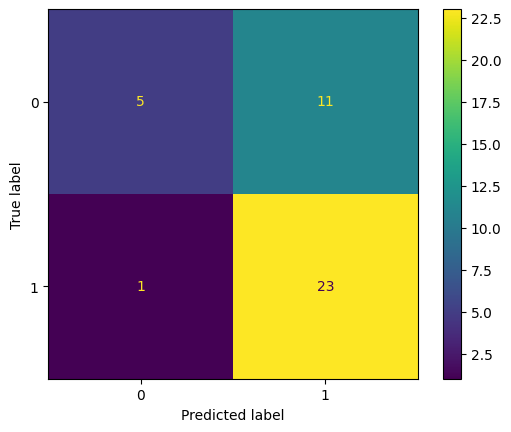

In [47]:
# CNN-rand: Word vectors are randomly initialized.
set_seed(42)
cnn_rand, optimizer = initilize_model(vocab_size=len(word2idx),
                                      embed_dim=300,
                                      learning_rate=0.25,
                                      dropout=0.5)
train(cnn_rand, optimizer, train_dataloader, val_dataloader, epochs=20)
# writer.flush() # meyakinkan bahwa proses training disimpan kedlm disk

jlnkan training dan evaluasi disertai pretrained embedding yg difreeze, sehingga kata yang baru tidak dimasukkan kedalam word vector

Start training...

 Epoch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
------------------------------------------------------------
   1    |   0.676925   |  0.693674  |   47.50   |   1.17   
   2    |   0.634402   |  0.669388  |   60.00   |   1.08   
   3    |   0.603442   |  0.664463  |   60.00   |   0.62   
   4    |   0.562212   |  0.661025  |   60.00   |   0.65   
   5    |   0.528401   |  0.663332  |   60.00   |   0.63   
   6    |   0.505275   |  0.636961  |   70.00   |   0.63   
   7    |   0.446290   |  0.632810  |   72.50   |   0.73   
   8    |   0.430954   |  0.660876  |   62.50   |   0.62   
   9    |   0.385001   |  0.720212  |   60.00   |   0.64   
  10    |   0.367330   |  0.621189  |   62.50   |   0.75   
  11    |   0.302527   |  0.605022  |   75.00   |   0.62   
  12    |   0.259113   |  0.651127  |   70.00   |   0.75   
  13    |   0.263228   |  0.592007  |   70.00   |   0.75   
  14    |   0.207462   |  0.592507  |   67.50   |   0.62   
  15    |   0.191882

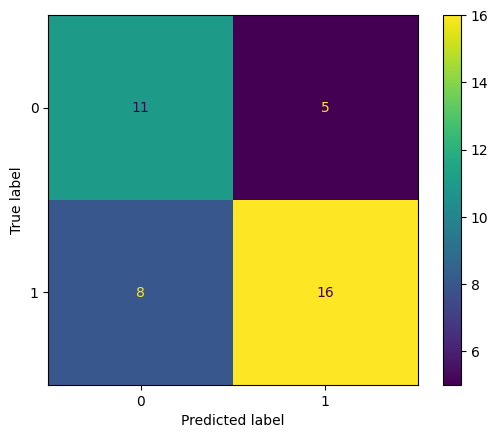

In [48]:
# CNN-static: fastText pretrained word vectors are used and freezed during training.
set_seed(42)
cnn_static, optimizer = initilize_model(pretrained_embedding=embeddings,
                                        freeze_embedding=True,
                                        learning_rate=0.25,
                                        dropout=0.5)
train(cnn_static, optimizer, train_dataloader, val_dataloader, epochs=20)
# writer.flush() # meyakinkan bahwa proses training disimpan kedlm disk

pretrained embeddingnya dilatih lagi

Start training...

 Epoch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
------------------------------------------------------------
   1    |   0.676877   |  0.693678  |   47.50   |   1.06   
   2    |   0.634440   |  0.669309  |   60.00   |   1.24   
   3    |   0.603063   |  0.664542  |   60.00   |   1.03   
   4    |   0.561367   |  0.661006  |   60.00   |   1.01   
   5    |   0.527810   |  0.663182  |   60.00   |   1.13   
   6    |   0.504182   |  0.636504  |   70.00   |   1.15   
   7    |   0.443888   |  0.632093  |   72.50   |   1.01   
   8    |   0.428346   |  0.660683  |   62.50   |   1.14   
   9    |   0.382650   |  0.720784  |   60.00   |   1.93   
  10    |   0.363574   |  0.621907  |   62.50   |   1.61   
  11    |   0.298813   |  0.606469  |   72.50   |   1.12   
  12    |   0.256071   |  0.652929  |   70.00   |   1.16   
  13    |   0.259599   |  0.593889  |   67.50   |   1.29   
  14    |   0.203134   |  0.595386  |   65.00   |   1.03   
  15    |   0.187390

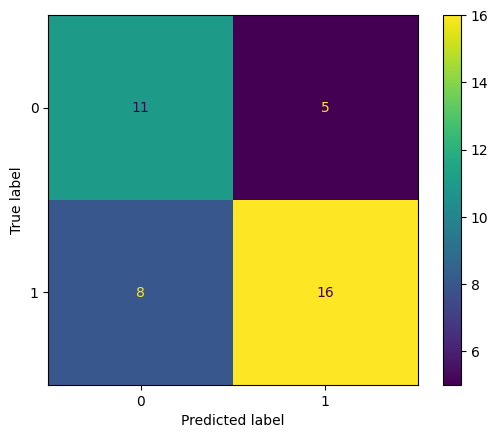

In [49]:
# CNN-non-static: fastText pretrained word vectors are fine-tuned during training.
set_seed(42)
cnn_non_static, optimizer = initilize_model(pretrained_embedding=embeddings,
                                            freeze_embedding=False,
                                            learning_rate=0.25,
                                            dropout=0.5)
train(cnn_non_static, optimizer, train_dataloader, val_dataloader, epochs=20)
# writer.flush() # meyakinkan bahwa proses training disimpan kedlm disk

## test

In [50]:
def predict(text, model=cnn_non_static.to("cpu"), max_len=62):
    """Predict probability that a review is positive."""

    # Tokenize, pad and encode text
    tokens = word_tokenize(text.lower())
    padded_tokens = tokens + ['<pad>'] * (max_len - len(tokens))
    input_id = [word2idx.get(token, word2idx['<unk>']) for token in padded_tokens]

    # Convert to PyTorch tensors
    input_id = torch.tensor(input_id).unsqueeze(dim=0)

    # Compute logits
    logits = model.forward(input_id)

    #  Compute probability
    probs = F.softmax(logits, dim=1).squeeze(dim=0)
    # probs = F.softmax(logits)
    # print(probs)
    # print(torch.max(probs))
    # print(f"This review is {probs[1] * 100:.2f}% positive.")
    if probs[1] == torch.max(probs):
      # print(f"This review is {probs[1] * 100:.2f}% positive")
      return "positive"
    elif probs[0] == torch.max(probs):
      # print(f"This review is {probs[0] * 100:.2f}% negative")
      return "negative"

prediksi kata yg baru

In [51]:
print(predict("artificial intellegent are so bad"))
print(predict("artificial intellegent is great work"))

negative
positive


In [52]:
no_label = df[df.Value.isna()]

In [53]:
no_label.Value.unique()

array([nan])

In [54]:
def prediksi(Komentar):
  return predict(Komentar)

In [55]:
no_label['prediksi'] = no_label['Komentar'].apply(predict)
no_label

<ipython-input-55-a01ab199adc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_label['prediksi'] = no_label['Komentar'].apply(predict)


,Value,Komentar,prediksi
4,NaN,yodacat ai artifici intellig,negative
7,NaN,wef say india agri sector scale new high ai em...,positive
8,NaN,chanc havent use plan that chang cnbc,positive
9,NaN,artifici intellig revolution way live work hel...,positive
10,NaN,$bad featur toronto year august th toronto hasand,negative
...,...,...,...
1022,NaN,lmart use streamlin organ mean worker seoul,positive
1023,NaN,infinit monkey digitalis turn effort music via...,positive
1024,NaN,hear latest popular varieti show led light pro...,positive
1025,NaN,explor world gener ai foundat model larg langu...,positive


<Axes: >

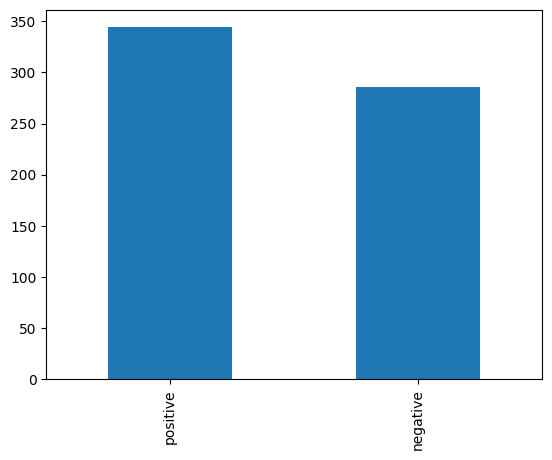

In [56]:
no_label["prediksi"].value_counts().plot(kind='bar')

<Axes: ylabel='prediksi'>

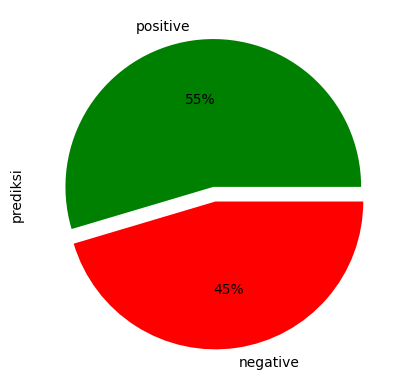

In [57]:
import matplotlib.pyplot as plt
# colors
colors = ['green', 'red']
explode = (0.05, 0.05)
# Pie Chart
no_label.prediksi.value_counts().plot(kind='pie', autopct='%1.0f%%', explode=explode, colors=colors)